In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# https://github.com/mithunraj984
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/godaddy-microbusiness-density-forecasting/sample_submission.csv
/kaggle/input/godaddy-microbusiness-density-forecasting/census_starter.csv
/kaggle/input/godaddy-microbusiness-density-forecasting/train.csv
/kaggle/input/godaddy-microbusiness-density-forecasting/test.csv


this notebook is based on https://www.kaggle.com/code/cdeotte/linear-regression-baseline-lb-1-092?kernelSessionId=114576763 and https://www.kaggle.com/code/cdeotte/seasonal-model-with-validation-lb-1-091#Write-Submission-CSV , thanks!

 As we can see, the linear model could do a great job,Why is SVM? In my opioin, the SVM with grid search could do a better job by chose kernel -['linear', 'rbf'],  which means it could predict linear by linear kernel and nonlinear by rbf kernel at the same time.

## update
version 11, optimize seasonal model   
version 10, change microbusiness_density<5 to 8,change seasonal rate from  (1.01,0.99) to (1.005,0.995)   LB 1.092
in version 9, change microbusiness_density<6 to 5,mse score 0.1 to 0.06,change seasonal rate from (1.003,0.997) to (1.01,0.99),which is worse.  
in version 8, add seasonal model , LB + 0.001  
in version 7, change microbusiness_density<6 to microbusiness_density<10, same result  
in version 6, change svm score from mae to mse,active<10000 to microbusiness_density<6  
in version 5, quick save , LB 1.093  
in version 4, active<10000 and SVM mae score <0.1, failed  
in version 3, baseline ,active<2500 and SVM mae score <0.005  ,cancelled  
version 1-2 is useless  

The update process maybe is somewhat confusing, sorry!

In [6]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import IPython

# load train,test

In [7]:
train = pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/train.csv')
train["first_day_of_month"] = pd.to_datetime(train["first_day_of_month"])
train = train.sort_values(['cfips','first_day_of_month']).reset_index(drop=True)

In [8]:
test = pd.read_csv('/kaggle/input/godaddy-microbusiness-density-forecasting/test.csv')
test["first_day_of_month"] = pd.to_datetime(test["first_day_of_month"])
test = test.sort_values(['cfips','first_day_of_month']).reset_index(drop=True)

# EDA

In [9]:
train.loc[train['cfips']==1001].head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


In [10]:
train.groupby('cfips').mean().shape

(3135, 2)

In [11]:
print(' pct density >10 :',(train.groupby('cfips').mean().microbusiness_density>10).sum()/3135*100)
print(' pct density >6 :',(train.groupby('cfips').mean().microbusiness_density>6).sum()/3135*100)
print(' pct density >5 :',(train.groupby('cfips').mean().microbusiness_density>5).sum()/3135*100)

 pct density >10 : 5.582137161084529
 pct density >6 : 16.108452950558213
 pct density >5 : 21.850079744816586


In [12]:
print(' pct active>25000 :',(train.groupby('cfips').mean().active>25000).sum()/3135*100)
print(' pct active >10000 :',(train.groupby('cfips').mean().active>10000).sum()/3135*100)
print(' pct active >5000 :',(train.groupby('cfips').mean().active>5000).sum()/3135*100)

 pct active>25000 : 5.263157894736842
 pct active >10000 : 10.303030303030303
 pct active >5000 : 15.821371610845295


seleced by density maybe better than active, so I change 'active>25000' to 'density >6'( in version 9 ,in change it to 5)

In [13]:
train.groupby('cfips').mean()[train.groupby('cfips').mean().microbusiness_density>6].describe()

,microbusiness_density,active
count,505.000000,5.050000e+02
mean,10.512872,3.254170e+04
std,7.437487,7.654644e+04
min,6.000438,6.589744e+00
25%,6.823842,2.943128e+03
50%,8.286520,1.065431e+04
75%,11.404270,3.217018e+04
max,87.196625,1.124174e+06


# predict with SVM

In [14]:
ID = train.cfips.unique()
train_x = np.arange(39).reshape(-1,1)
test_x = np.arange(39,47).reshape(-1,1)

pre = np.zeros((len(ID),8))

In [15]:
TRAIN_SZ = len(train)//3135
TEST_SZ = len(test)//3135
# x_train = np.arange(TRAIN_SZ).reshape((-1,1))
# x_test = np.arange(TRAIN_SZ-1,TRAIN_SZ+TEST_SZ).reshape((-1,1))

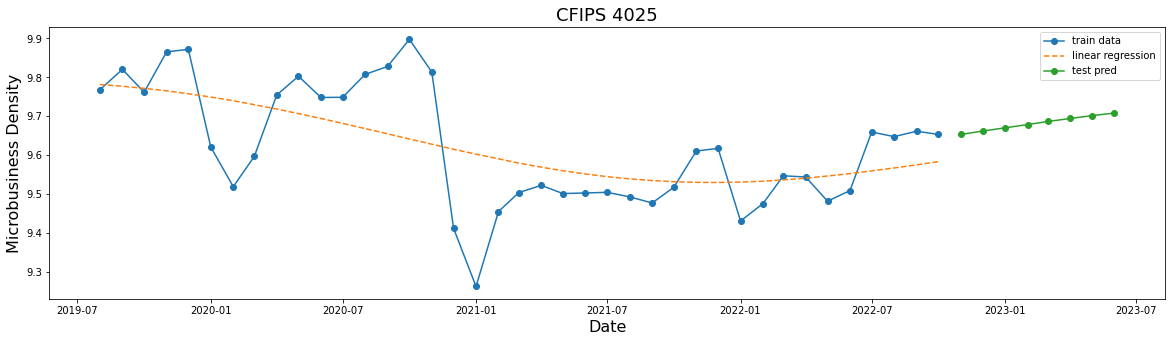

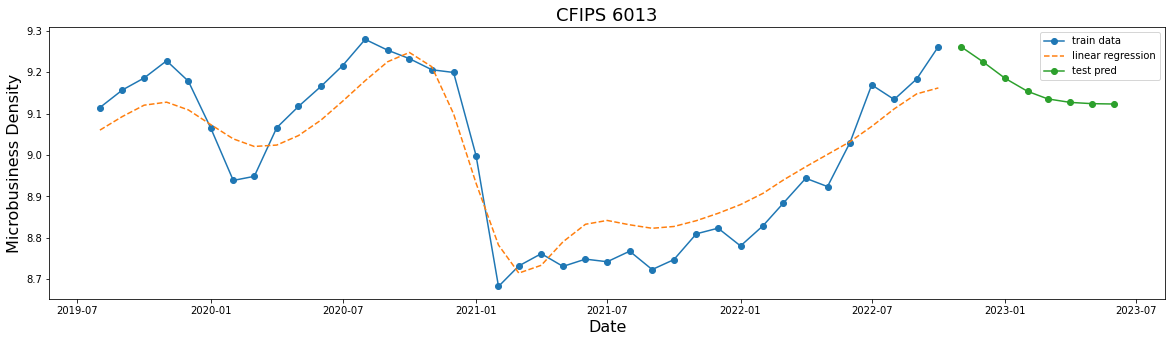

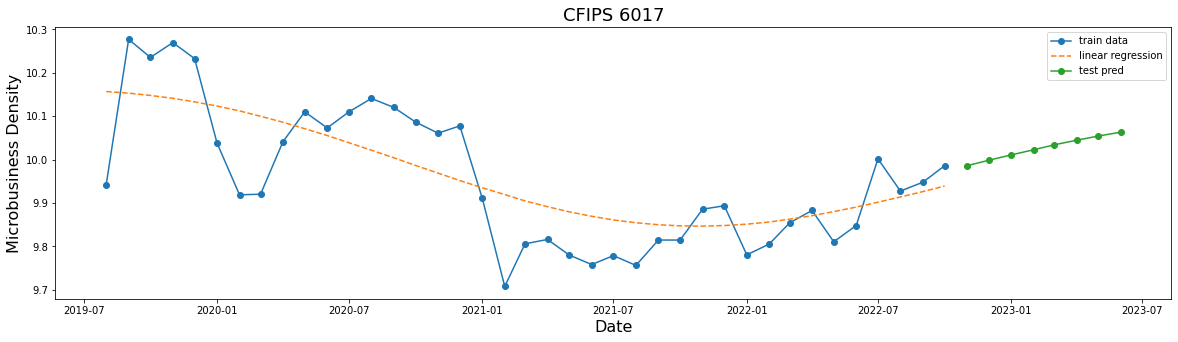

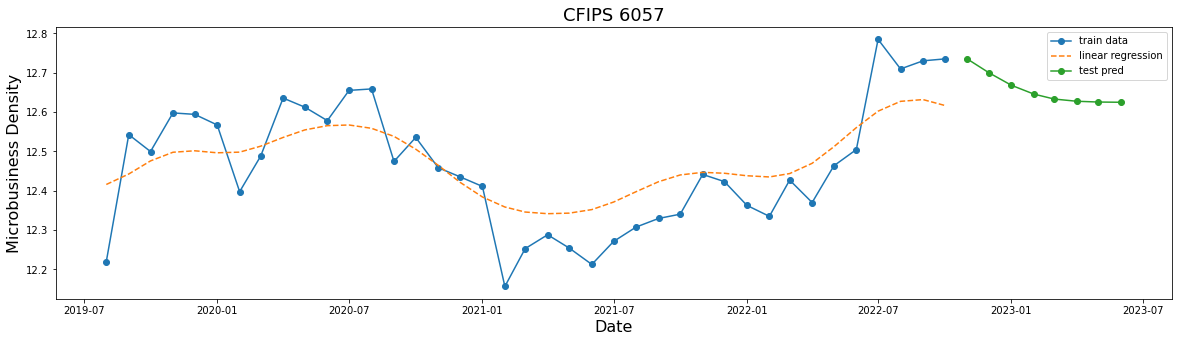

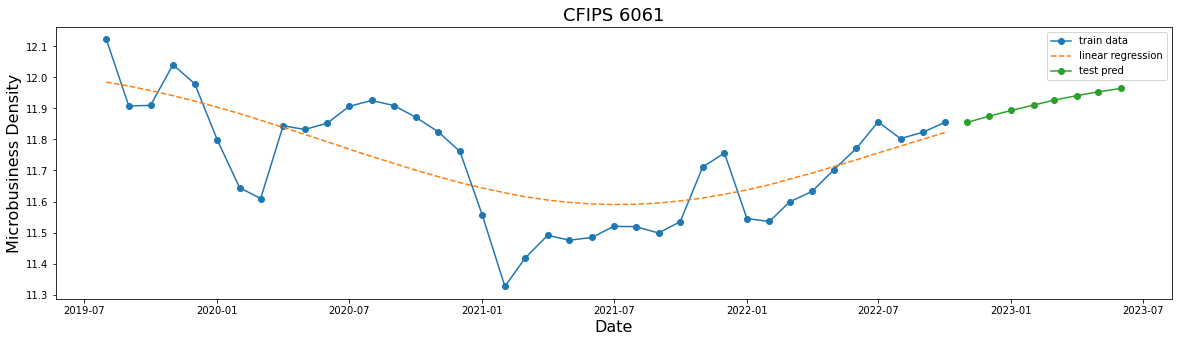

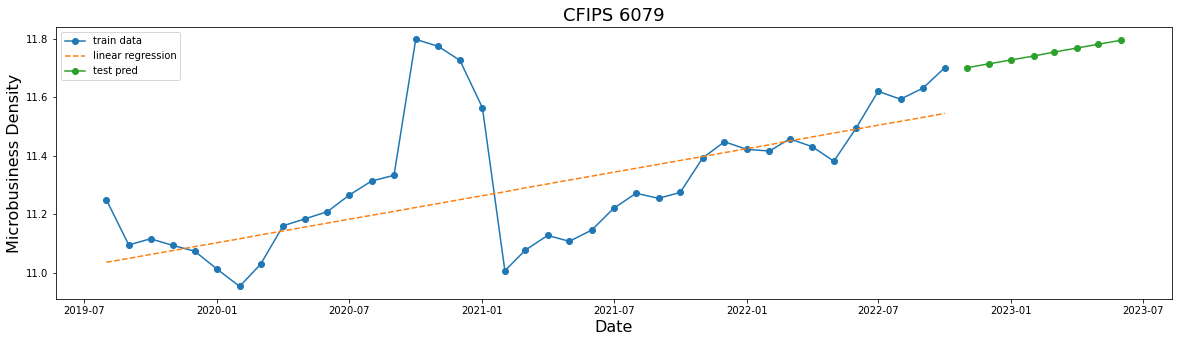

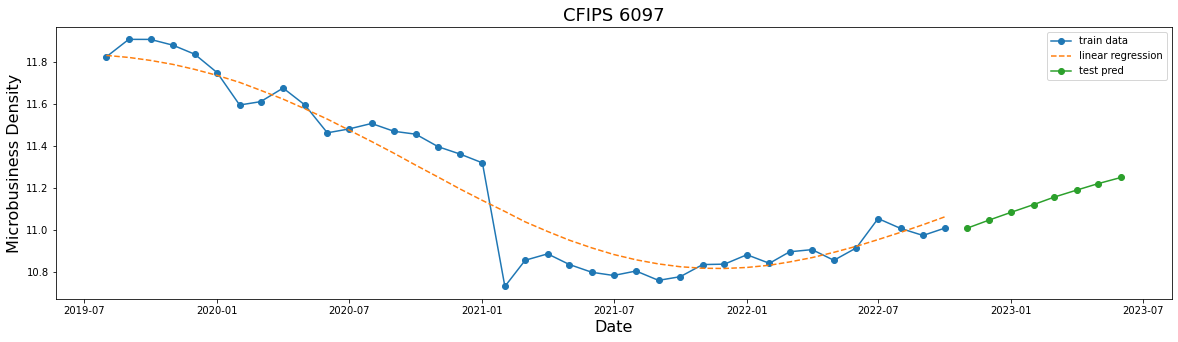

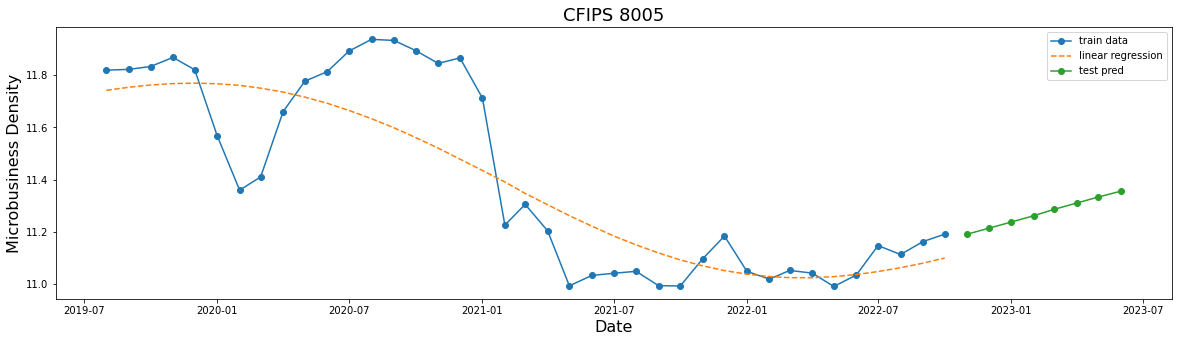

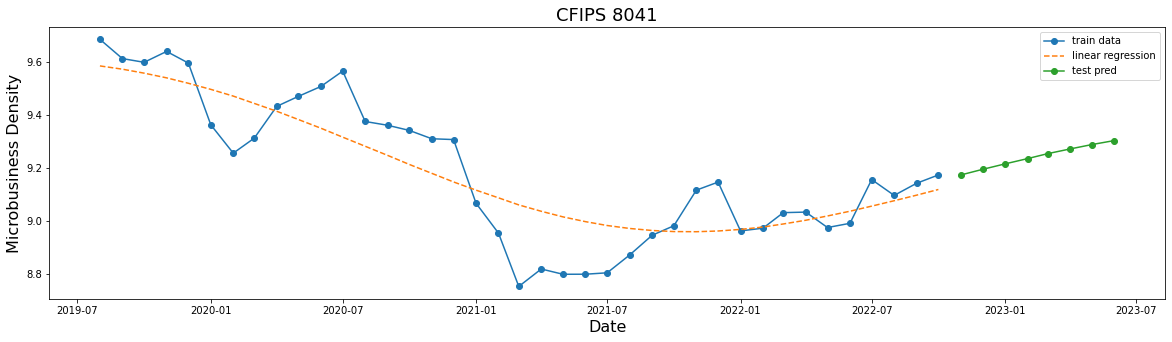

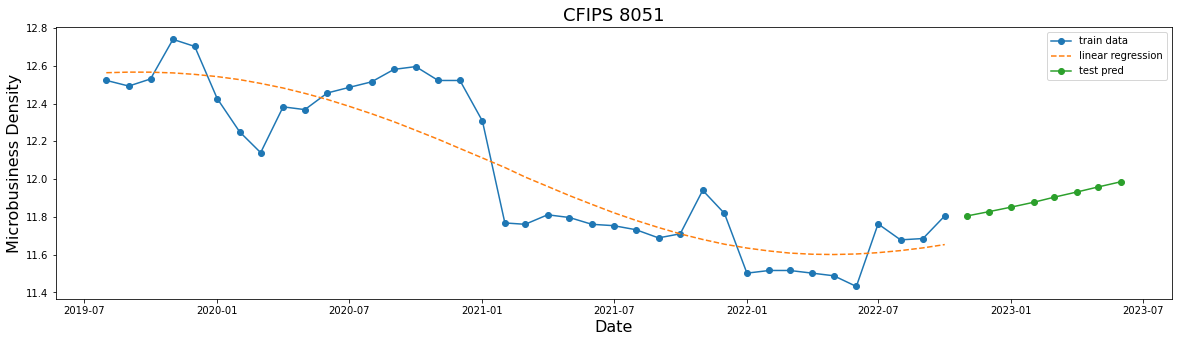

99.96810207336523%%
 k:  104 k2: 164


In [16]:
k = 0 
k2 = 0
density_threshold =8
for n,ids in enumerate(ID):
    
    print(f'{n/len(ID)*100}%',end='\r')

    df = train.loc[train.cfips==ids]
    last = df.microbusiness_density.values[-1]
    # last_preds[i,] = [last]*TEST_SZ
    
    
# part 1
    if df.microbusiness_density.mean()< density_threshold :
        pre[n,] = last
        continue

        
# part 2 : seasonal model
    # COMPUTE SEASONAL TRENDS
    WIDTH1 = 5; WIDTH2 = 7; WIDTH3 = 7
    # RECENT
    x0a = df.microbusiness_density.values[-1-WIDTH1:-1]
    x0 = np.median(x0a)
    # ONE YEAR AGO
    x1 = df.microbusiness_density.values[-12-1+1]
    x2a = df.microbusiness_density.values[-12-1-WIDTH2+1:-12-1+1]
    x2 = np.median(x2a)
    # TWO YEARS AGO
    x3 = df.microbusiness_density.values[-24-1+1]
    x4a = df.microbusiness_density.values[-24-1-WIDTH3+1:-24-1+1]
    x4 = np.median(x4a)

    # FIT TRANSFORM SEASONAL MODEL
    p = last
    
    if (x1>x2)&(x3>x4)&(last>x0): # p *= 1.005
        sea_rec = n
        p = [p*1.005**(i+1) for i in range(8)]
    elif (x1<x2)&(x3<x4)&(last<x0): # p *= 0.995
        p = [p*0.995**(i+1) for i in range(8)]
    # seasonal_preds[i,] = [p]*TEST_SZ
    
    
#part 3: SVM
    #  compute svm
    parameters = {
        'kernel': ['linear', 'rbf'],
        'C': [0.1, 0.5,0.9,1,2,5],
        'gamma': [0.0005,0.001,0.002,0.1,1]
    }
    svm_model = GridSearchCV(SVR(), param_grid=parameters, cv=3, scoring='neg_mean_squared_error')
    svm_model.fit(train_x,df.microbusiness_density)
    if abs(svm_model.best_score_) < 0.06:
        if k < 10:
            tmp = svm_model.predict(test_x)
            gap = df.microbusiness_density.values[-1]-tmp[0] 
            tmp = tmp + gap
            pre[n,] = tmp
            plt.figure(figsize=(20,5))
            plt.plot(df.first_day_of_month,df.microbusiness_density,'-o',label='train data')
            plt.plot(df.first_day_of_month,svm_model.predict(train_x),'--',label='linear regression')
            plt.plot(test.first_day_of_month.values[:8],pre[n,],'-o',label='test pred')
            plt.title(f'CFIPS {ids}',size=18)
            plt.xlabel('Date',size=16)
            plt.ylabel('Microbusiness Density',size=16)
            plt.legend()
            plt.show()
        k = k + 1
    else:
        pre[n,] = p
        k2 = k2 +1
        # IPython.display.clear_output()
        
print('\n k: ',k,'k2:',k2)

In [17]:
pre[sea_rec]
# 后续对seasonal model的调整，可考虑对last值分类，不同类别乘不同系数（可根据以往trend来决定系数）

array([228.89543325, 230.03991042, 231.19010997, 232.34606052,
       233.50779082, 234.67532977, 235.84870642, 237.02794996])

There are 104 counties with both svm score < 0.06 and large density.
There are 164 counties with both a seasonal trend and large population.

# submit file

In [18]:
# NOTE TEST IS SORTED BY CFIPS AND DATA. ADD PREDS TO DATAFRAME
test['microbusiness_density'] = pre.reshape((-1))
sub = test[['row_id','microbusiness_density']]
sub.to_csv('sunbmission.csv',index=False)
print( sub.shape )
sub.head()

(25080, 2)


,row_id,microbusiness_density
0,1001_2022-11-01,3.463856
1,1001_2022-12-01,3.463856
2,1001_2023-01-01,3.463856
3,1001_2023-02-01,3.463856
4,1001_2023-03-01,3.463856
